INVESTIGATION REVIEW

The summary of my findings includes: Mostly factors that have affected the Borrowers annual % rate.

The distribution of the borrower's yearly percentage rate looks to be multimodal. Most loan amounts have a right skew with numerous distinct peaks. 

The most common loan amount is $4,000. Three loan terms—12 months, 36 months, and 60 months—are available, with 36 months being the most popular. 

The majority of the loans are now in progress, and a sizeable portion of them have already been paid off. The past-due debts are divided into six groups based on how many days have passed since their due date. Debt consolidation is the loan category that receives the most requests. 

The monthly income distribution is right-skewed. The average monthly income reported by borrowers appears to be less than $5,000 most stated income as $30,000

The loan amount is directly proportional to the term status given for loan repayment.

Borrowers that own homes have more employment history than their non home ownwers.

Also, non-homeowners primarily borrowed amounts between $0 and $5,000 with a maximum of $30,000. 
Even though the majority of homeowners ranged in income from $5,000 and upwards,

Home owner borrowers have longer job histories than non home onwers, and non-owners often received loans in the range of $0 to $5,000 with a maximum of $30,000. While the majority of homeowners were dispersed among various quantities between 5000 and above.

Loans for a 60-month duration are concentrated more on higher loan amounts and have borrowers' annual rate percentages between 0.1 and 0.35.

The 36 months term loans have borrowers annual rate percentage between 0 - 0.4 with a few outliers going to 0.5.

whereas loans for a 12-month term are primarily for low loan amounts and have borrowers' annual rate percentages between 0 and 0.35.

DATASET REVIEW

Each of the 113,937 loans in the Propser Loan Data Set has 81 variables, including the loan amount, borrower rate (or interest rate), current loan status, borrower income, and many more. 

The dataset includes data on peer-to-peer loans made possible by the Prosper credit firm.

It is well known that several parameters, including the borrower's credit score, debt-to-income ratio, employment history, income, loan term, and loan amount, are typically taken into account by credit companies when deciding the interest rates for loans to be issued to its borrowers. 

For the purpose of this investigation I have taken the following variables: 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#Loading the dataset into a dataframe

In [2]:
df = pd.read_csv('prosperLoanData.csv')

target_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                    'LoanOriginationDate', 'MonthlyLoanPayment']

#Extracting the variables we want to use and storing them in a seperate dataframe called 'sub_df'

In [3]:
sub_df = df[target_variables]

#Rename Column names for easy typing

In [4]:
sub_df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

#Change the datatype of variables that are incorrectly assigned

In [5]:
sub_df['LoanOriginationDate'] = pd.to_datetime(sub_df['LoanOriginationDate'])

#replace the missing values in ProsperScore with 0 to indicate 'Not available'

In [6]:
sub_df['ProsperScore'] = sub_df['ProsperScore'].fillna(0)

#Dealing with the missing values in BorrowerAPR by replacing the missing values with the mean of BorrowerAPR

In [8]:
sub_df['BorrowerAPR'] = sub_df['BorrowerAPR'].fillna(sub_df['BorrowerAPR'].mean())
sub_df.info()

cat = (sub_df['LoanStatus'] == 'Completed') | (sub_df['LoanStatus'] == 'Chargedoff') | (sub_df['LoanStatus'] == 'Defaulted')
sub_df = sub_df[cat]

def change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
sub_df['LoanStatus'] = sub_df.apply(change, axis=1)
sub_df['LoanStatus'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113937 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

EXPLORATORY ANALYSIS (Factors Affecting Borrowers annual % rate, BorrowersAPR?)

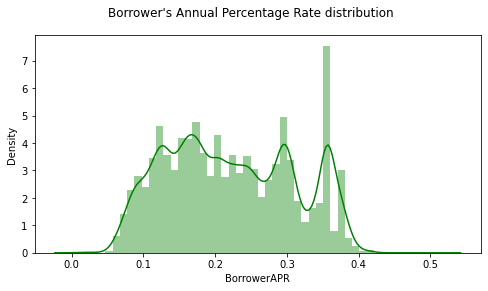

In [14]:
plt.figure(figsize=(8,4))
plt.suptitle("Borrower's Annual Percentage Rate distribution")
sb.distplot(sub_df['BorrowerAPR'], color = 'green');

CORRELATION ANALYSIS BETWEEN VARIABLES

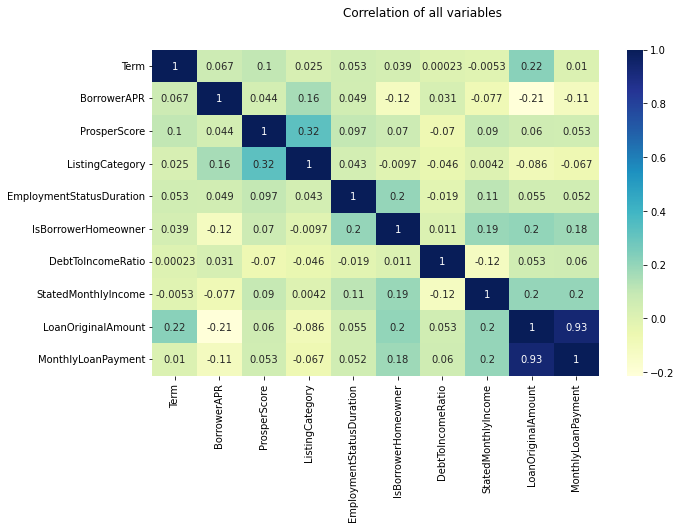

In [16]:
plt.figure(figsize = [10, 6])
sb.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True)
plt.suptitle("Correlation of all variables");

TERM VS LOANORIGINAL AMOUNT

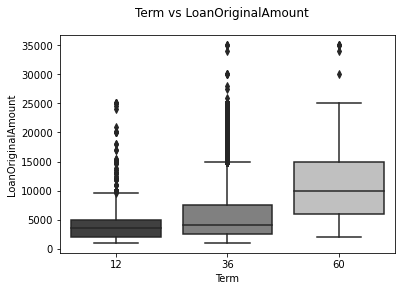

In [17]:
sb.boxplot(x='Term',y='LoanOriginalAmount',data=sub_df,palette='gray')
plt.suptitle("Term vs LoanOriginalAmount");

In [ ]:
BORROWERSAPR VS LOAN ORIGINAL AMOUNT

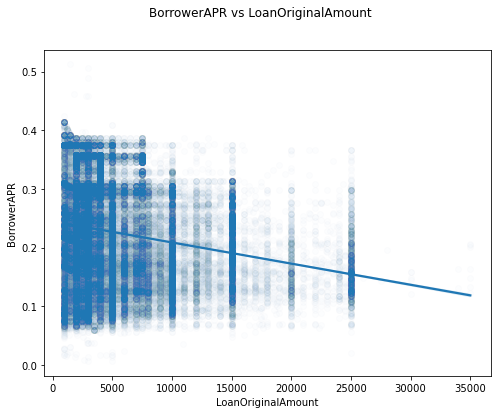

In [24]:
plt.figure(figsize = [8, 6])
sb.regplot(x = 'LoanOriginalAmount' , y = 'BorrowerAPR', data = sub_df, scatter_kws={'alpha':0.01})
plt.suptitle("BorrowerAPR vs LoanOriginalAmount");

In [ ]:
LOAN ORIGINAL AMOUNT VS MONTHLY LOAN PAYMENT

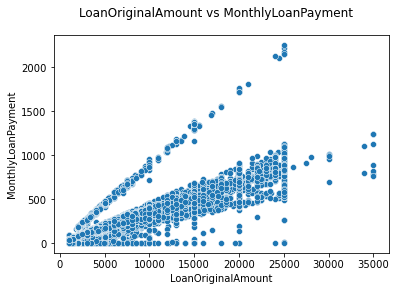

In [25]:
sb.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = sub_df)
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment");

Term Vs LoanoriginalAmount Vs BorrowerAPR

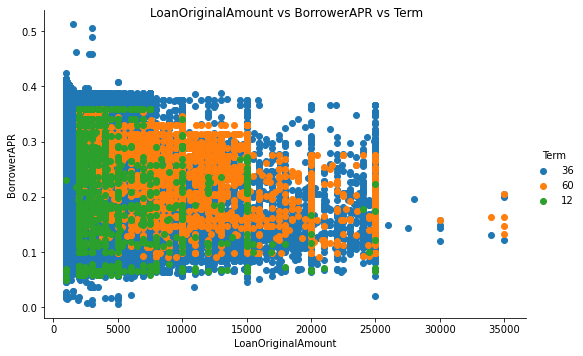

In [26]:
g = sb.FacetGrid(data = sub_df, hue = 'Term',hue_order = [36, 60, 12], size = 5, aspect = 1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.suptitle("LoanOriginalAmount vs BorrowerAPR vs Term");

LoanOriginalAmount vs MonthlyLoanPayment vs Term

<Figure size 864x576 with 0 Axes>

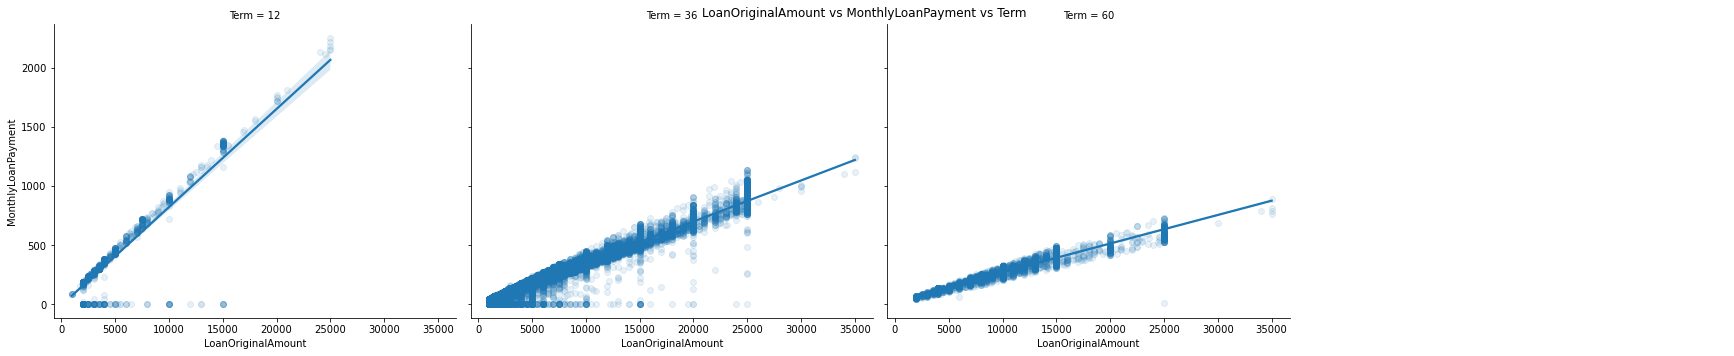

In [27]:
plt.figure(figsize = [12, 8]);
g=sb.FacetGrid(data=sub_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment vs Term");

Due to the shorter period, monthly fees for loans that last only 12 months are typically higher than those for other terms. While loans with 60-month maturities are more evenly distributed.

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan_SlideDeck.ipynb --to slides --post serve --no-input --no-prompt